## Introduction to Double Linked List:

From Jing Wang, Mented by Vahe Andonians Salmas

A double linked list is a fundamental data structure commonly used in computer science and software development for its efficient data manipulation capabilities. It extends the concept of a singly linked list by incorporating an additional pointer that allows traversal in both directions. Each node in a double linked list contains a reference to both the next node and the previous node, enabling easy traversal in either direction.

The provided Python code snippet offers a basic implementation of a double linked list, comprising two essential classes: *Node* and *LinkedList*. The *Node* class represents an individual node in the list, while the *LinkedList* class serves as the structure that organizes and manages the nodes.

The *Node* class includes attributes for storing data and maintaining references to the previous and next nodes. On the other hand, the *LinkedList* class consists of various methods that enable operations such as *append*, **delet*, *get*, and *insert* nodes at specific positions within the list.

The *append* method adds a new node to the end of the list, the *delete* method removes a node with a specific value from the list, the *get* method retrieves the data at a particular index, and the *insert* method inserts a new node at a specified position. With these methods, the double linked list provides a flexible and efficient way to manage data, making it an indispensable tool for various applications in programming and data management.

## Implementation of a Doubly Linked List

In [54]:
class Node:
    """A class representing a node in a double linked list."""
    def __init__(self, data=None):
        """
        Initializes a new Node instance.
        
        Parameters:
        data: The data to be stored in the node. Defaults to None.
        
        self.next: Contain the next node address. Defaults to None.
        self.before: Contain the before node address. Defaults to None.
        """
        self.data = data
        self.next = None
        self.before = None


class LinkedList:
    def __init__(self):
        """Initializes a new LinkedList instance with a head and tail pointing to None."""
        self.head = None
        self.end = None

    def append(self, data):
        """
        Appends a new node with the specified data to the end of the list.
        
        Parameters:
        data: The data to be stored in the new node.
        """
        new_node = Node(data)
        if not self.head: #if node is the head
            self.head = new_node # let the head equal to the new_node
            self.end = new_node # let the end equal to the new_node
        else: #if node should apped at the end
            current = self.end 
            new_node.before = current
            current.next = new_node
            self.end=new_node

    def delete(self, data):
        """
        Deletes the first node with the specified data from the list.
        
        Parameters:
        data: The data of the node to be deleted.
        """
        current=self.head
        while current:
            if current.data == data:
                if current.before:
                    current.before.next = current.next
                else:
                    self.head=current.next
                if current.next:
                    current.next.before = current.before
                else: 
                    self.end=current.before
                return
            current = current.next
        return f"Didn't find data {data}"

    def get(self, index):
        """
        Gets the data of the node at the specified index.
        
        Parameters:
        index: The index of the node.
        
        Returns:
        The data of the node at the specified index, or None if index is out of bounds.
        """
        current = self.head
        i = 0

        while current and i < index:
            current = current.next
            i += 1

        if current:
            return current.data
        else:
            return None

    def insert(self, data, index):
        """
        Inserts a new node with the specified data at the specified index.
        
        Parameters:
        data: The data to be stored in the new node.
        index: The index at which to insert the new node.
        """
        new_node = Node(data)
        if index == 0:
            new_node.next = self.head
            if self.head:
                self.head.before = new_node
            self.head = new_node
        else:
            current = self.head
            i = 0
            while current and i < index - 1:
                current = current.next
                i += 1
            if current:
                new_node.next = current.next
                if current.next:
                    current.next.before = new_node
                current.next = new_node
                new_node.before = current

    def print_list(self):
        '''
        print_list is a fuction to print Linked List
        '''
        current = self.head
        while current:
            print(current.data, end=" ")
            if current != self.end:
                print('<->',end=" ")
            current = current.next
        print(' ')
        return

## Illustration of Linked List Operations:

In [55]:
# Create a new linked list
my_list = LinkedList()

# Append some data to the list
my_list.append(1)
my_list.append(2)
my_list.append(3)
my_list.append(4)

# Print the initial list
# It should contain: 1 <-> 2 <-> 3 <-> 4
my_list.print_list()

# Test the delete method
my_list.delete(3)
my_list.delete(1)

# Print the updated list
# It should contain: 2 <-> 4
my_list.print_list()


# Test the get method
data_at_index_0 = my_list.get(0)  # Should return 2
data_at_index_1 = my_list.get(1)  # Should return 4
data_at_index_2 = my_list.get(2)  # Should return None (out of bounds)

print(f"Data at index 0: {data_at_index_0}")
print(f"Data at index 1: {data_at_index_1}")
print(f"Data at index 2: {data_at_index_2}")

# Test the insert method
my_list.insert(5, 0)  # Insert 5 at the beginning
my_list.insert(3, 2)  # Insert 3 at index 2

# Print the final list
# It should contain: 5 <-> 2 <-> 3 <-> 4
my_list.print_list()


1 <-> 2 <-> 3 <-> 4  
2 <-> 4  
Data at index 0: 2
Data at index 1: 4
Data at index 2: None
5 <-> 2 <-> 3 <-> 4  


## Performance Testing and Comparison:

In [56]:
import timeit

# Define a function to test access time in a doubly linked list
def test_linked_list_access():
    return my_list.get(900)  # Access the element at index 900

# Define a function to test access time in an array
def test_array_access():
    return my_array[900]  # Access the element at index 900

my_list = LinkedList()  # Create a new linked list
for i in range(1000):
    my_list.append(i)  # Append 1000 elements
my_array = [i for i in range(1000)]  # Create an array with 1000 elements

# Measure the time taken to access elements in a doubly linked list
linked_list_time = timeit.timeit(test_linked_list_access, number=1000)

# Measure the time taken to access elements in an array
array_time = timeit.timeit(test_array_access, number=1000)

print(f"Time taken to access an element in a doubly linked list: {linked_list_time:.6f} seconds")
print(f"Time taken to access an element in an array: {array_time:.6f} seconds")


Time taken to access an element in a doubly linked list: 0.025013 seconds
Time taken to access an element in an array: 0.000037 seconds


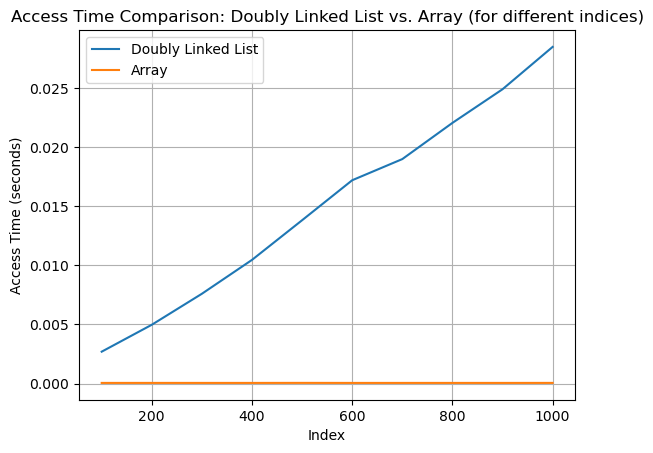

In [57]:
import timeit
import matplotlib.pyplot as plt

# Define a function to test access time in a doubly linked list
def test_linked_list_access(index):
    return my_list.get(index)

# Define a function to test access time in an array
def test_array_access(index):
    return my_array[index]

# Initialize lists to store execution times
linked_list_times = []
array_times = []

# Vary the size of the data structure and measure access times for different indices
indices = range(100, 1001, 100)
for index in indices:
    my_list = LinkedList()  # Create a new linked list
    for i in range(1001):
        my_list.append(i)

    my_array = [i for i in range(1001)]  # Create an array with 1000 elements

    # Measure the time taken to access an element in a doubly linked list
    linked_list_time = timeit.timeit(lambda: test_linked_list_access(index), number=1000)
    linked_list_times.append(linked_list_time)

    # Measure the time taken to access an element in an array
    array_time = timeit.timeit(lambda: test_array_access(index), number=1000)
    array_times.append(array_time)

# Create a plot to compare access times for different indices
plt.figure()
plt.plot(indices, linked_list_times, label='Doubly Linked List')
plt.plot(indices, array_times, label='Array')
plt.xlabel('Index')
plt.ylabel('Access Time (seconds)')
plt.legend()
plt.title('Access Time Comparison: Doubly Linked List vs. Array (for different indices)')
plt.grid(True)
plt.show()


## Conclution
The provided code showcases a comprehensive implementation of a doubly linked list, a crucial data structure in computer science. The *Node* class represents individual nodes with data, next, and before attributes, enabling efficient data storage and bidirectional traversal. This complements the functionality of the *LinkedList* class, which facilitates essential operations like node addition, deletion, retrieval, and insertion.

By executing a series of operations on the linked list instance, the code demonstrates the practicality of the doubly linked list. It exemplifies adding and deleting data, retrieving data at specific indices, and inserting new data at desired positions. Additionally, the code conducts performance tests using the timeit module, comparing the access times of the doubly linked list and arrays under various data scale scenarios. The results are visualized through a plotted graph, facilitating a comparative analysis of their performance in different operational contexts.

In essence, the doubly linked list offers dynamic data management capabilities, despite potential variations in access times compared to arrays. Its flexibility in handling frequent data modifications makes it a valuable tool for applications demanding agile data manipulation.